# Exploratory Data Analysis
This notebook demonstrates foundational data visualization principles and best practices for exploratory data analysis through an example dataset. 

## Data: U.S. Disease Burden Data
The dataset from the Institute for Health Metrics and Evaluation ([IHME](http://www.healthdata.org/)) contains the burden of disease attributable to different diseases in the U.S. in 2016. It was downloaded through the Global Health Data Exchange ([ghdx](http://ghdx.healthdata.org/)) with this [configuration](http://ghdx.healthdata.org/gbd-results-tool?params=gbd-api-2016-permalink/eae875d8528958aaf3d17f28fe0c194b) of the query tool. To see how the data was formatted, see the `prep_data.R` script. Columns include:

- `cause_name`: categorical, e.g. `Asthma`
- `sex`: categorical, `Male` or `Female`
- `cause_family`: categorical, `Communicable`, `Non-communicable`, `Injuries`
- `deaths`: continuous, number _deaths_ attributable to the cause
- `ylls`: continuous, number of  _Years of Life Lost_ attributable to the cause (more years are lost when a younger person dies)
- `ylds`: continuous, number of  _Years Lived with Disability_ attributable to the cause (amount of "life" lost due to living with a condition)
- `dalys`: continuous, number of  _Disability Adjusted Life Years_ attributable to the cause (a composite measure of health burden, a combination of `ylls` + `ylds`)

In order to run this notebook, you will need to install the `Altair` visualization package using the following command _on your terminal_:

```bash
pip install -U altair vega_datasets notebook vega
```
See [these instructions](https://altair-viz.github.io/getting_started/installation.html#installation-notebook) for more information.

For a great primer on Altair, see [this blog post](http://vallandingham.me/altair_intro.html).

# Data Structure
Before visually exploring the data, you need to load it into python and understand its structure.

In [1]:
# Load necessary packages for analysis and visualization
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns

# Enable interactivity with altair
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
# Load the .csv data and assess it's properties (data types, column names, and shape)
burden = pd.read_csv("data/prepped_data.csv")
burden.dtypes # data types
burden.columns # column names
burden.shape # rows, columns

(326, 7)

In [3]:
# View the first few rows of the data
burden.head()

,sex,cause,cause_family,dalys,deaths,ylds,ylls
0,Female,Acute glomerulonephritis,Non-communicable,1.703480e+03,97.765094,76.041475,1.627438e+03
1,Female,Adverse effects of medical treatment,Injuries,7.907367e+04,2777.587454,23098.624744,5.597504e+04
2,Female,African trypanosomiasis,Communicable,0.000000e+00,0.000000,0.000000,0.000000e+00
3,Female,Alcohol use disorders,Non-communicable,3.257287e+05,2847.327962,228155.723699,9.757296e+04
4,Female,Alzheimer disease and other dementias,Non-communicable,1.543941e+06,160062.760738,373231.045657,1.170710e+06


In [4]:
# Use the `.info()` method to get info on the data frame
burden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 7 columns):
sex             326 non-null object
cause           326 non-null object
cause_family    326 non-null object
dalys           326 non-null float64
deaths          265 non-null float64
ylds            310 non-null float64
ylls            265 non-null float64
dtypes: float64(4), object(3)
memory usage: 17.9+ KB


In [5]:
# Describe the distribution of the quantitative columns
burden.describe()

,dalys,deaths,ylds,ylls
count,3.260000e+02,265.000000,3.100000e+02,2.650000e+02
mean,2.706605e+05,9748.574985,1.347981e+05,1.754824e+05
std,5.379158e+05,28743.638302,3.443039e+05,4.288170e+05
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,5.894650e+03,162.311992,1.528101e+03,3.363668e+03
50%,7.479427e+04,2006.270554,1.065101e+04,4.518182e+04
75%,2.746124e+05,7316.099691,7.395546e+04,1.514723e+05
max,4.900743e+06,287920.938440,2.896033e+06,4.740143e+06


In [6]:
# Get unique values for cause families (one approach)
burden.cause_family.value_counts()

Non-communicable    188
Communicable        104
Injuries             34
Name: cause_family, dtype: int64

In [7]:
# Get unique values for sex (another approach)
pd.Categorical(burden.sex).describe()

,counts,freqs
categories,,
Female,163,0.5
Male,163,0.5


# Univariate data explorations

## Univariate analysis: continuous variables
When performing univariable exploratory data analysis, the primary question of interest is:

> What is the **range** and **distribution** of values for a given variable?

For example, let's begin by independently considering only one column (`ylds`) for `females`.

In [8]:
# Isolate data of interest
num_female_burden = burden[(burden.sex == "Female")]

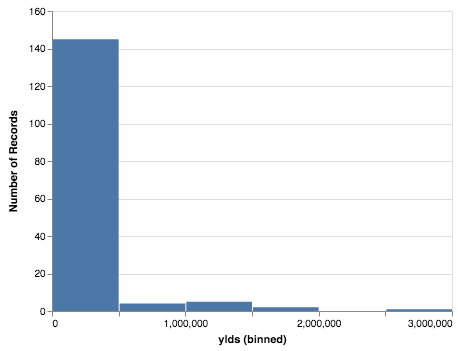

In [9]:
# What is the distribution of this set of numbers? 

# Histogram
alt.Chart(num_female_burden).mark_bar().encode(
    alt.X("ylds:Q", bin=True),
    y='count()',
)

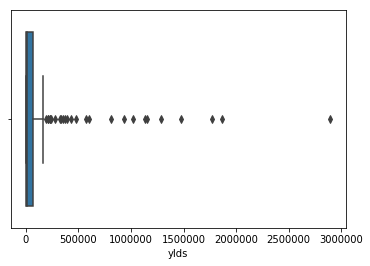

In [10]:
# Boxplot 
sns.boxplot(x=num_female_burden.ylds)

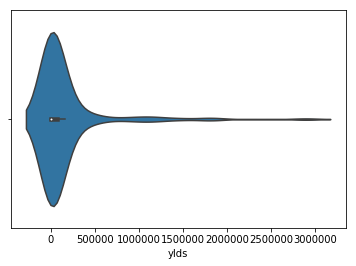

In [11]:
# Violin plot
sns.violinplot(num_female_burden.ylds)

## Univariate analysis: parts of a whole
Depending on your dataset, it may make sense to reprsent values using a layout that indicates parts of a whole

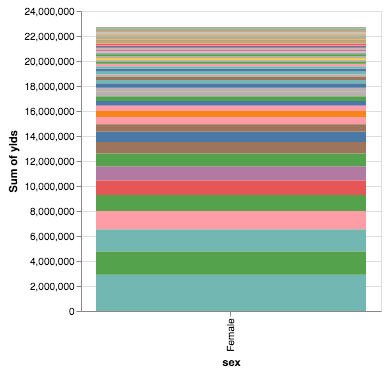

In [12]:
# Stacked bar chart (with interactivity)
alt.Chart(num_female_burden).mark_bar().encode(
    x='sex',
    y='sum(ylds)',
    order=alt.Order('ylds', sort='descending'),
    color=alt.Color('cause', legend=None), 
    tooltip=['cause', 'ylds']
).properties(
   width=300,
   height=300
).interactive()

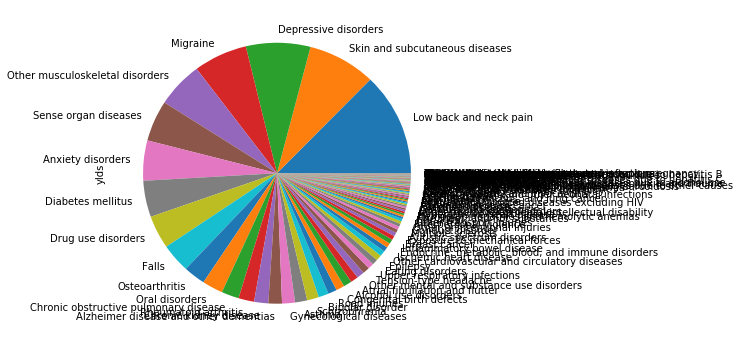

In [13]:
# Pie chart (warning -- people will critique this! See section below on Visual Encodings)
# Set the index as the cause name (the index is displayed as the pie chart label)
num_female_burden.index = num_female_burden.cause

# Sort the values in descending order, then use the built in `.plot` method
num_female_burden.sort_values("ylds", ascending=False).plot(kind="pie", y="ylds", legend=False, figsize=(6,6))

## Univariate analysis: Categorical variables
When performing univariate analysis for categorical variables, the question of interest is often:

> How often does each value occur in the data set?

Making this comparison often involves _computing_ the number of occurances of each unique value in a column, and then visualizing the resulting continuous variable (the number of counts). For example, using this dataset, you may be interested in how many times each _cause family_ appears in the dataset.

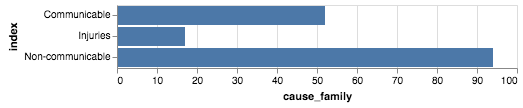

In [14]:
# Compute the number of times each cause family appears in the dataset
counts = num_female_burden.cause_family.value_counts()
counts_df = pd.DataFrame(counts).reset_index() # create column from index

# Create a simple bar chart
alt.Chart(counts_df).mark_bar().encode(
    y = "index", 
    x = "cause_family"
)

# Multivariate analysis: Comparing two continuous variables
When comparing two continuous variables, a **scatterplot** allows you to asses the co-linearity of the relationship. For example, we can compare the `ylls` to the `ylds`, essentially asking this question: 

> Do the diseases that cause lots of premature death also cause lots of disability?

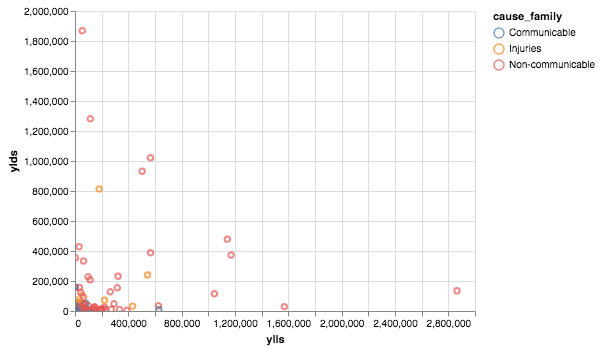

In [15]:
# Scatterplot of `ylls` and `ylds` (numbers and females only)
alt.Chart(num_female_burden).mark_point().encode(
    x='ylls',
    y='ylds',
    color='cause_family',
    tooltip='cause'
).interactive()

For a more exploratory analysis, this type of comparison can be made using a **scatterplot matrix**

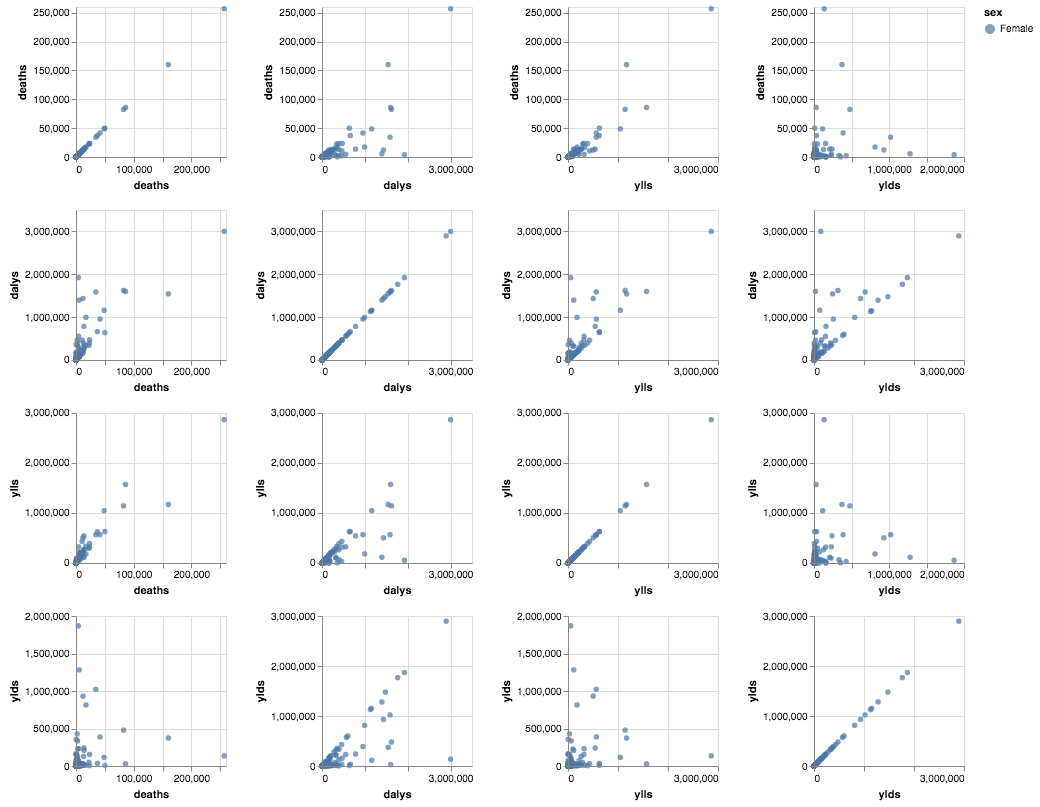

In [16]:
# Interactive scatterplot matrix!

# Define a brush for selecting across charts
brush = alt.selection_interval()

# Create the matrix of charts
alt.Chart(num_female_burden).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color=alt.condition(brush, 'sex', alt.value('lightgray')),
    tooltip = "cause"
).properties(
    width=150,
    height=150, 
    selection=brush
).repeat(
    row=['deaths', 'dalys', 'ylls', 'ylds'],
    column=['deaths', 'dalys', 'ylls', 'ylds'],
)

# Multivariate analysis: Comparing one continuous and one categorical variable
When comparing a continuous variable to a categorical variable, the question of interest is:

> How does the distribution of the categorical variable vary across categories?

For example, you may be interested in seeing how the **number of `ylls`** varies across cause families. A great approach for doing this is to create multiple renditions of the same chart for each category, known as **small multiples**.

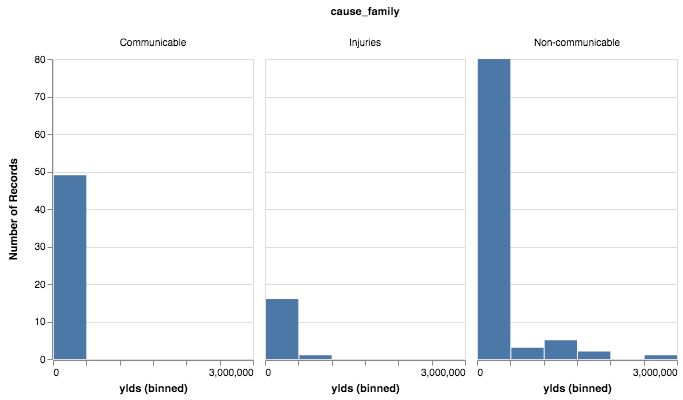

In [17]:
# Create small multiple histograms of the `ylls` by cause family
# Histogram
alt.Chart(num_female_burden).mark_bar().encode(
    alt.X("ylds:Q", bin=True),
    y='count()',
).properties(width = 200, height = 300).facet(column='cause_family:N')


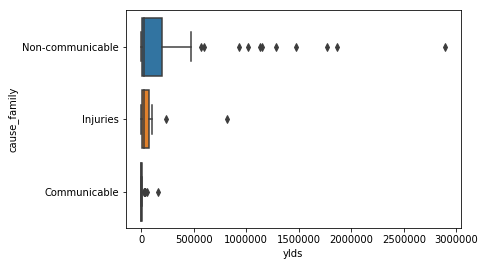

In [18]:
# Boxplot 
sns.boxplot(data=num_female_burden, x="ylds", y = "cause_family")

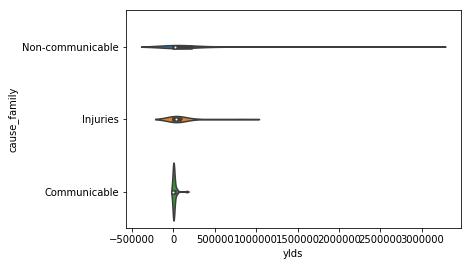

In [19]:
# Boxplot 
sns.violinplot(data=num_female_burden, x="ylds", y = "cause_family")

# Multivariate analysis: Comparing one continuous and _two_ categorical variables
When comparing a continuous variable to _two_ categorical variable, the question of interest is:

> How does the distribution of the categorical variable vary across each combination of categories?

For example, you may be interested in seeing how the **number of `ylls`** varies across cause families **and** `sex`. A great approach for doing this is to create multiple renditions of the same chart for each category, known as **small multiples**, then add an additional encoding for the secondary variable of interest.

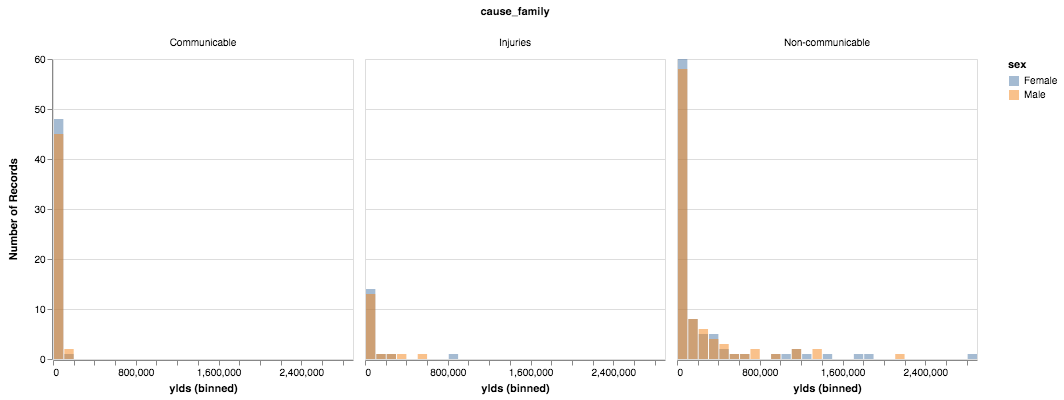

In [20]:
# Adding a coor encoding for `sex` for the histogram, and facet by cause family
alt.Chart(burden).mark_bar(opacity=.5).encode(
    alt.X("ylds:Q", bin=alt.Bin(maxbins=50)),
    alt.Y('count()', stack=None),
    color="sex"
).properties(width=300).facet(column='cause_family:N')

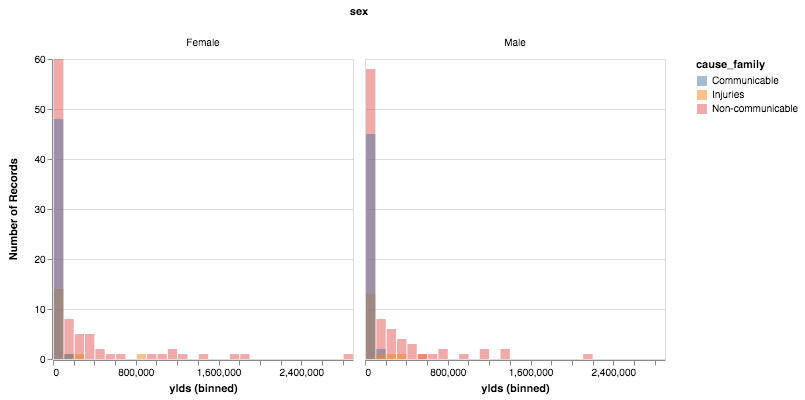

In [21]:
# Adding a coor encoding for `cause_family` for the histogram, and facet by `sex`
alt.Chart(burden).mark_bar(opacity=.5).encode(
    alt.X("ylds:Q", bin=alt.Bin(maxbins=50)),
    alt.Y('count()', stack=None),
    color="cause_family"
).properties(width=300).facet(column='sex:N')

## Multivariate analysis: Expressing the values of a continuous variable in a hierarchy (of a categorical variable)

This data set has a natural hierarchy to it -- each cause exists with a cause family. While the code is not shown here, it is worth noting that various visual forms exist to express values within a hierarchy.

**Treemap**: Think of this as a rectangular pie-chart capable of expressing hierarhcy. Below is a screenshot of this data from the [GBD Compare Tool](https://vizhub.healthdata.org/gbd-compare/).

<img src="imgs/treemap.png" alt="Treemap of cause hierarhcy" width=500>

**Sunburst Diagrams**: A _sunburst diagram_ also allows you to express hierarhcy in a circular layout (created using d3.js).

<img alt="Sunburst diagram of health burden data" src="imgs/sunburst.png" width=500>

**Circle Packing**: A _circle packing_ layout also allows you to express hierarhcy in your data (created using d3.js).

<img alt="Circle pack layout of health burden data" src="imgs/circle-pack.png" width=500>

# Multivariate analysis: Comparing two categorical variables
When comparing two categorical variables, you are often interested in the following:

> How do these values co-occur?

Lets imagine that a different set of diseases were present in the data set for males and females (this is not the case in this data set). A relevant question would be, how often does each `cause_family`-`sex` pair appear in the dataset? This could be evaluated using a heatmap, as shown with a random subset of data below.

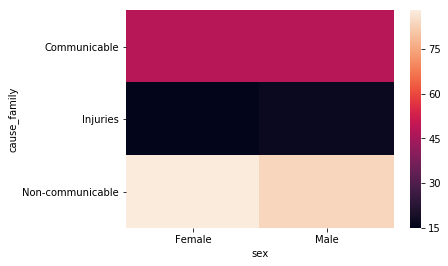

In [22]:
# Grab 300 random rows, group by `cause_family` and `sex`, and count the co-occurances
grouped_data = burden.sample(300).groupby(["cause_family", "sex"]).size().reset_index(name="count")

# Show the result in a heatmap
sns.heatmap(grouped_data.pivot("cause_family", "sex", "count"))

# Choosing optimal visual encodings
When selecting visual encodings (the shapes that you wish to represent numbers), you should choose the forms that are most accurately _visually decoded_ (this is referred to as the **effectiveness** of a display). The perceptability of encodings has been [well studied](https://pdfs.semanticscholar.org/565d/843c2c0e60915709268ac4224894469d82d5.pdf), and are listed below in _ranked_ (descending) order:

- **Position**: the horizontal or vertical position of an element along a common scale
- **Length**: the length of a segment, typically used in a stacked bar chart
- **Area**: the area of an element, such as a circle or a rectangle, typically used in a bubble chart (a
scatterplot with dierently sized markers) or a in a treemap
- **Angle**: the rotational angle of each marker, typically used in a circular layout like a pie chart
- **Color**: the color of each marker, usually along a continuous color scale
- **Volume**: the volume of a three-dimensional shape, typically used in a 3D bar chart

As an example, in working with a small subset of the data, we should be able to easily distinguish between values (see below).

In [23]:
# Getting a subset of the data
small_causes = num_female_burden[(num_female_burden.dalys >3)].sort_values("dalys", ascending=False).tail(8)
small_causes.sex = '' # replace as empty string for graphing below

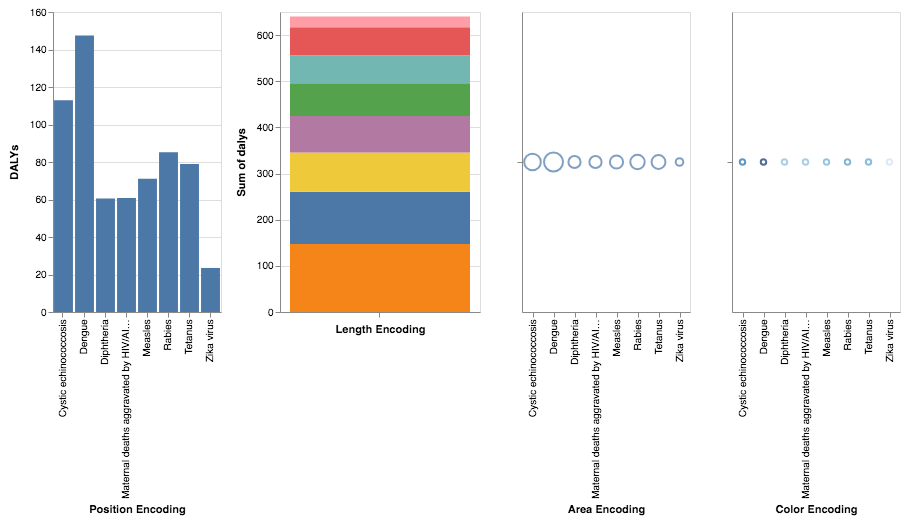

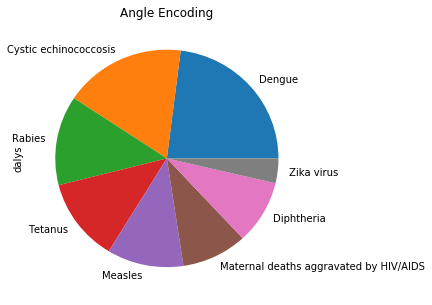

In [24]:
# Show the number of dalys in multiple forms
chart = alt.hconcat() # concatenate charts

# Position encoding (compares position along the common -- y axis -- scale)
bar_chart = alt.Chart(small_causes).mark_bar().encode(
    x = alt.X("cause", axis=alt.Axis(title='Position Encoding')),
    y = alt.Y("dalys", axis=alt.Axis(title='DALYs')),
).properties(height=300)

# Length encoding (compares length of each segment)
length_encoding = alt.Chart(small_causes).mark_bar().encode(
    x = alt.X("sex", axis=alt.Axis(title='Length Encoding')),
    y='sum(dalys)',
    order=alt.Order('dalys', sort='descending'),
    color=alt.Color('cause', legend=None), 
    tooltip=['cause', 'dalys']
).properties(height=300, width=200)

# Area encoding
area_encoding = alt.Chart(small_causes).mark_point().encode(
    x = alt.X("cause", axis=alt.Axis(title='Area Encoding')),
    y = alt.Y("sex", axis=alt.Axis(title='')),
    size = alt.Size("dalys", legend=None)
).properties(height=300)

# Color encoding
color_encoding = alt.Chart(small_causes).mark_point().encode(
    x = alt.X("cause", axis=alt.Axis(title='Color Encoding')),
    y = alt.Y("sex", axis=alt.Axis(title='')),
    color = alt.Color("dalys", legend=None)
).properties(height=300)

chart |= bar_chart
chart |= length_encoding
chart |= area_encoding
chart |= color_encoding

small_causes.sort_values("dalys", ascending=False).plot(kind="pie", y="dalys", legend=False, title="Angle Encoding", figsize=(5,5))
chart

# Expressive Data Displays
In addition to choosing _effective_ dispalys, you should choose layouts that are able to **express** all of the data (see [this study](https://research.tableau.com/sites/default/files/p110-mackinlay.pdf) for more information). While the above principles would tell you to select a **position encoding**, these are not always able to _express_ all of the data (as is the case below)

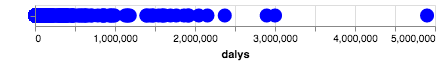

In [25]:
# Choose an ideal encoding (position) for the number of YLLs 
burden["tmp"] = '' # for graphing
alt.Chart(burden).mark_point().encode(
    x = "dalys", 
    y = alt.Y("tmp", axis=alt.Axis(title='')), 
    opacity = alt.value(1), 
    fill=alt.value("blue"), 
    size=alt.value(200)
)

To avoid **occlusion**, you can use small multiples and adjust the opacity

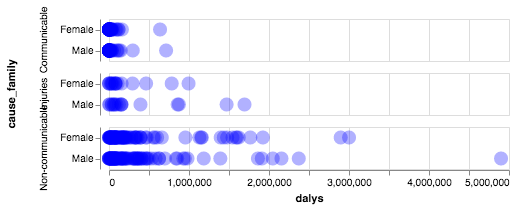

In [26]:
alt.Chart(burden).mark_point().encode(
    x = "dalys", 
    y = alt.Y("sex", axis=alt.Axis(title='')), 
    opacity = alt.value(.3), 
    fill=alt.value("blue"), 
    size=alt.value(200)
).facet("cause_family")

However, depending on the number of observations, this will still have occlusion issues (which is why a _historgram_ is a good choice -- it performs a data transformation so that it can use a position encoding!)